<a href="https://colab.research.google.com/github/monali0802/CE888/blob/main/Lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data.shape[0])

14


In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  data_mean = np.mean(x)
  final_arr =[0]*n_bootstraps
  i = 0
  while i < n_bootstraps:
    random_choice = np.random.choice(x, sample_size)
    final_arr[i] = np.mean(random_choice)
    i+= 1
  # calculate 95% confidence intervals (100 - alpha)
  alpha = 5.0
  # calculate lower percentile (e.g. 2.5)
  lower_p = alpha / 2.0
  # retrieve observation at lower percentile
  lower = np.percentile(final_arr, lower_p)
  # calculate upper percentile (e.g. 97.5)
  upper_p = (100 - alpha) + (alpha / 2.0)
  # retrieve observation at upper percentile
  upper = np.percentile(final_arr, upper_p)
  return data_mean, lower, upper


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

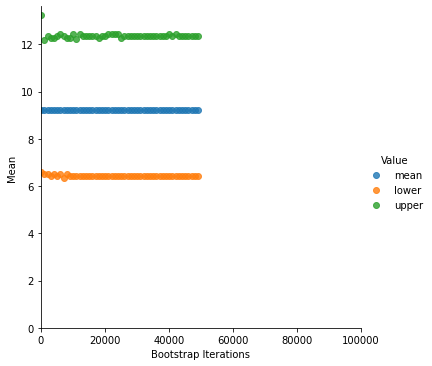

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  data_mean = np.mean(sample)
  final_arr =[0] * n_bootstraps
  i = 0
  while i < n_bootstraps:
    random_choice = np.random.choice(sample, sample_size)
    final_arr[i] = np.mean(random_choice)
    i += 1
  alpha = 100 - ci
  lower_p = alpha / 2.0
  upper_p = (100 - alpha) + (alpha / 2.0)
  lower = np.percentile(final_arr, lower_p)
  upper = np.percentile(final_arr, upper_p)
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

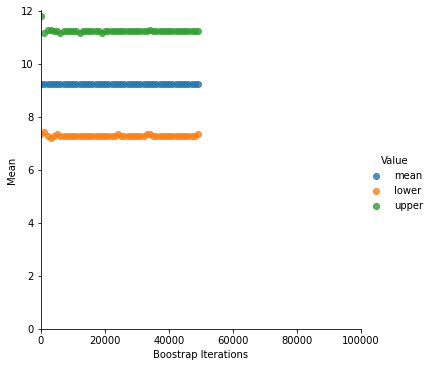

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [26]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
vehicle = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
vehicle_data = vehicle
# print(len(vehicle_data["Current fleet"]))
# vehicle_data = vehicle_data.dropna()
vehicle_cur_array = np.array(vehicle_data["Current fleet"].dropna())
vehicle_new_array = np.array(vehicle_data["New Fleet"].dropna())
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [27]:
# <---INSERT YOUR CODE HERE--->
def permutation_loop(concatenate, current_len):
  perm = np.random.permutation(concatenate)
    
  perm_current = perm[:current_len]
  perm_new = perm[current_len:]
  
  perm_new_mean = np.mean(perm_new)
  perm_current_mean = np.mean(perm_current)
  # print("perm_new_mean",perm_new_mean)
  # print("perm_current_mean",perm_current_mean)
  t_perm = perm_new_mean - perm_current_mean
  return t_perm

def boostrap_mean_vehicle(vehicle_cur_array, vehicle_new_array, ci_v, iteration):
  currentList = vehicle_cur_array
  newList = vehicle_new_array
  
  current_len = len(currentList)
  new_len = len(newList)

  current_mean = np.mean(currentList)
  new_mean = np.mean(newList)

  ci_cur_mean = bootstrap_mean_ci(currentList, current_len, 10000, ci_v)
  print("95% current fleet mean: ",ci_cur_mean[0],"Lower: ", ci_cur_mean[1],"Upper: ", ci_cur_mean[2])
  ci_new_mean = bootstrap_mean_ci(newList, new_len, 10000, ci_v)
  print("95% new fleet mean ",ci_new_mean[0],"Lower: ", ci_new_mean[1],"Upper: ", ci_new_mean[2])
  
  t_mean = new_mean - current_mean

  concatenate = np.concatenate((currentList, newList))
 
  i = 0
  for check in range(iteration):
    t_perm = permutation_loop(concatenate, current_len)
    
    if t_perm > t_mean:
      i += 1
  p_value = i/iteration
  print("This many time perm value greater than observe ",i)
  return p_value

print("p_value",boostrap_mean_vehicle(vehicle_cur_array, vehicle_new_array, 95, 20000))


95% current fleet mean:  20.14457831325301 Lower:  19.373393574297186 Upper:  20.95983935742972
95% new fleet mean  30.481012658227847 Lower:  29.139240506329113 Upper:  31.82278481012658
This many time perm value greater than observe  0
p_value 0.0


In [9]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    return pvalue

In [13]:
# 90% interval of mean with 10000 iteration of customer data in quiz
def bootstrap_mean(x, sample_size, n_bootstraps, c_interval):
  data_mean = np.mean(x)
  final_arr =[0]*n_bootstraps
  i = 0
  while i < n_bootstraps:
    random_choice = np.random.choice(x, sample_size)
    final_arr[i] = np.mean(random_choice)
    i+= 1
  # calculate 95% confidence intervals (100 - alpha)
  alpha = 100 - c_interval
  # calculate lower percentile (e.g. 2.5)
  lower_p = alpha / 2.0
  # retrieve observation at lower percentile
  lower = np.percentile(final_arr, lower_p)
  # calculate upper percentile (e.g. 97.5)
  upper_p = (100 - alpha) + (alpha / 2.0)
  # retrieve observation at upper percentile
  upper = np.percentile(final_arr, upper_p)
  return data_mean, lower, upper


print(bootstrap_mean(data, data.shape[0], 10000, 90))

(9.214285714285714, 6.785714285714286, 11.789285714285663)


In [28]:
# 95% interval of standard deviation with 10000 iteration of customer data in quiz
def bootstrap_std(x, sample_size, n_bootstraps, c_interval):
  data_mean = np.std(x)
  final_arr =[0]*n_bootstraps
  i = 0
  while i < n_bootstraps:
    random_choice = np.random.choice(x, sample_size)
    final_arr[i] = np.std(random_choice)
    i+= 1
  # calculate 95% confidence intervals (100 - alpha)
  alpha = 100 - c_interval
  # calculate lower percentile (e.g. 2.5)
  lower_p = alpha / 2.0
  # retrieve observation at lower percentile
  lower = np.percentile(final_arr, lower_p)
  # calculate upper percentile (e.g. 97.5)
  upper_p = (100 - alpha) + (alpha / 2.0)
  # retrieve observation at upper percentile
  upper = np.percentile(final_arr, upper_p)
  return data_mean, lower, upper


print(bootstrap_std(data, data.shape[0], 10000, 95))

(5.684296305594556, 2.7188870140180184, 7.401427051768994)


In [25]:
 cur_len = len(vehicle_cur_array)
 print(bootstrap_mean_ci(vehicle_cur_array, cur_len, 10000, 85))

(20.14457831325301, 19.562248995983936, 20.72690763052209)


In [29]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
  data_mean = np.std(sample)
  final_arr =[0] * n_bootstraps
  i = 0
  while i < n_bootstraps:
    random_choice = np.random.choice(sample, sample_size)
    final_arr[i] = np.std(random_choice)
    i += 1
  alpha = 100 - ci
  lower_p = alpha / 2.0
  upper_p = (100 - alpha) + (alpha / 2.0)
  lower = np.percentile(final_arr, lower_p)
  upper = np.percentile(final_arr, upper_p)
  return data_mean, lower, upper

cur_len = len(vehicle_cur_array)
print(bootstrap_std_ci(vehicle_cur_array, cur_len, 10000, 99))

(6.401805462179708, 5.619820923444959, 7.113067533949266)


In [35]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

def permutation_loop(concatenate, current_len):
  perm = np.random.permutation(concatenate)
    
  perm_current = perm[:current_len]
  perm_new = perm[current_len:]
  
  perm_new_mean = np.mean(perm_new)
  perm_current_mean = np.mean(perm_current)
  # print("perm_new_mean",perm_new_mean)
  # print("perm_current_mean",perm_current_mean)
  t_perm = perm_new_mean - perm_current_mean
  return t_perm

def boostrap_mean_OH_PA(dem_share_OH, dem_share_PA, ci_v, iteration):
  oh_len = len(dem_share_OH)
  pa_len = len(dem_share_PA)

  oh_mean = np.mean(dem_share_OH)
  pa_mean = np.mean(dem_share_PA)
  
  print("OH ", oh_mean) 
  print("PA ", pa_mean)
  ci_oh_mean = bootstrap_mean_ci(dem_share_OH, oh_len, 100000 , ci_v)
  print("dem_share_OH mean: ",ci_oh_mean[0],"Lower: ", ci_oh_mean[1],"Upper: ", ci_oh_mean[2])
  ci_pa_mean = bootstrap_mean_ci(dem_share_PA, pa_len, 100000 , ci_v)
  print("dem_share_PA mean ",ci_pa_mean[0],"Lower: ", ci_pa_mean[1],"Upper: ", ci_pa_mean[2])
  
  t_mean = pa_mean - oh_mean

  concatenate = np.concatenate((dem_share_OH, dem_share_PA))
 
  i = 0
  for check in range(iteration):
    t_perm = permutation_loop(concatenate, oh_len)
    
    if t_perm > t_mean:
      i += 1
  p_value = i/iteration
  print("This many time perm value greater than observe ",i)
  return p_value

print("p_value",boostrap_mean_OH_PA(dem_share_OH, dem_share_PA, 90, 25000))

OH  44.31818181818182
PA  45.476417910447765
dem_share_OH mean:  44.31818181818182 Lower:  42.579772727272726 Upper:  46.04342045454545
dem_share_PA mean  45.476417910447765 Lower:  43.55820895522388 Upper:  47.46373880597014
This many time perm value greater than observe  5805
p_value 0.2322
